# Chapter 5: Introduction to Neural Networks


New Skills in This Chapter:

• Creating a neural network in NumPy to learn the relation between inputs and outputs

• Adjusting parameters in a neural network based on partial derivatives and the gradient descent algorithm

• Creating a neural network using Keras APIs

• Using the Keras API to train a neural network and make predictions

• Customizing training a neural network using the GradientTape API in TensorFlow

***
*The human brain is estimated to have about a hundred billion nerve cells, two
million miles of axons, and a million billion synapses, making it the most complex
structure, natural or artificial, on earth.*
***
-- T. Green, S.F. Heinemann, and J.F. Gusella (Neuron, 1998)

***

In [1]:
import os

os.makedirs("files/ch05", exist_ok=True)

# 5.1 Anatomy of A Neural Network

## 5.1.1 Elements of A Neural Network

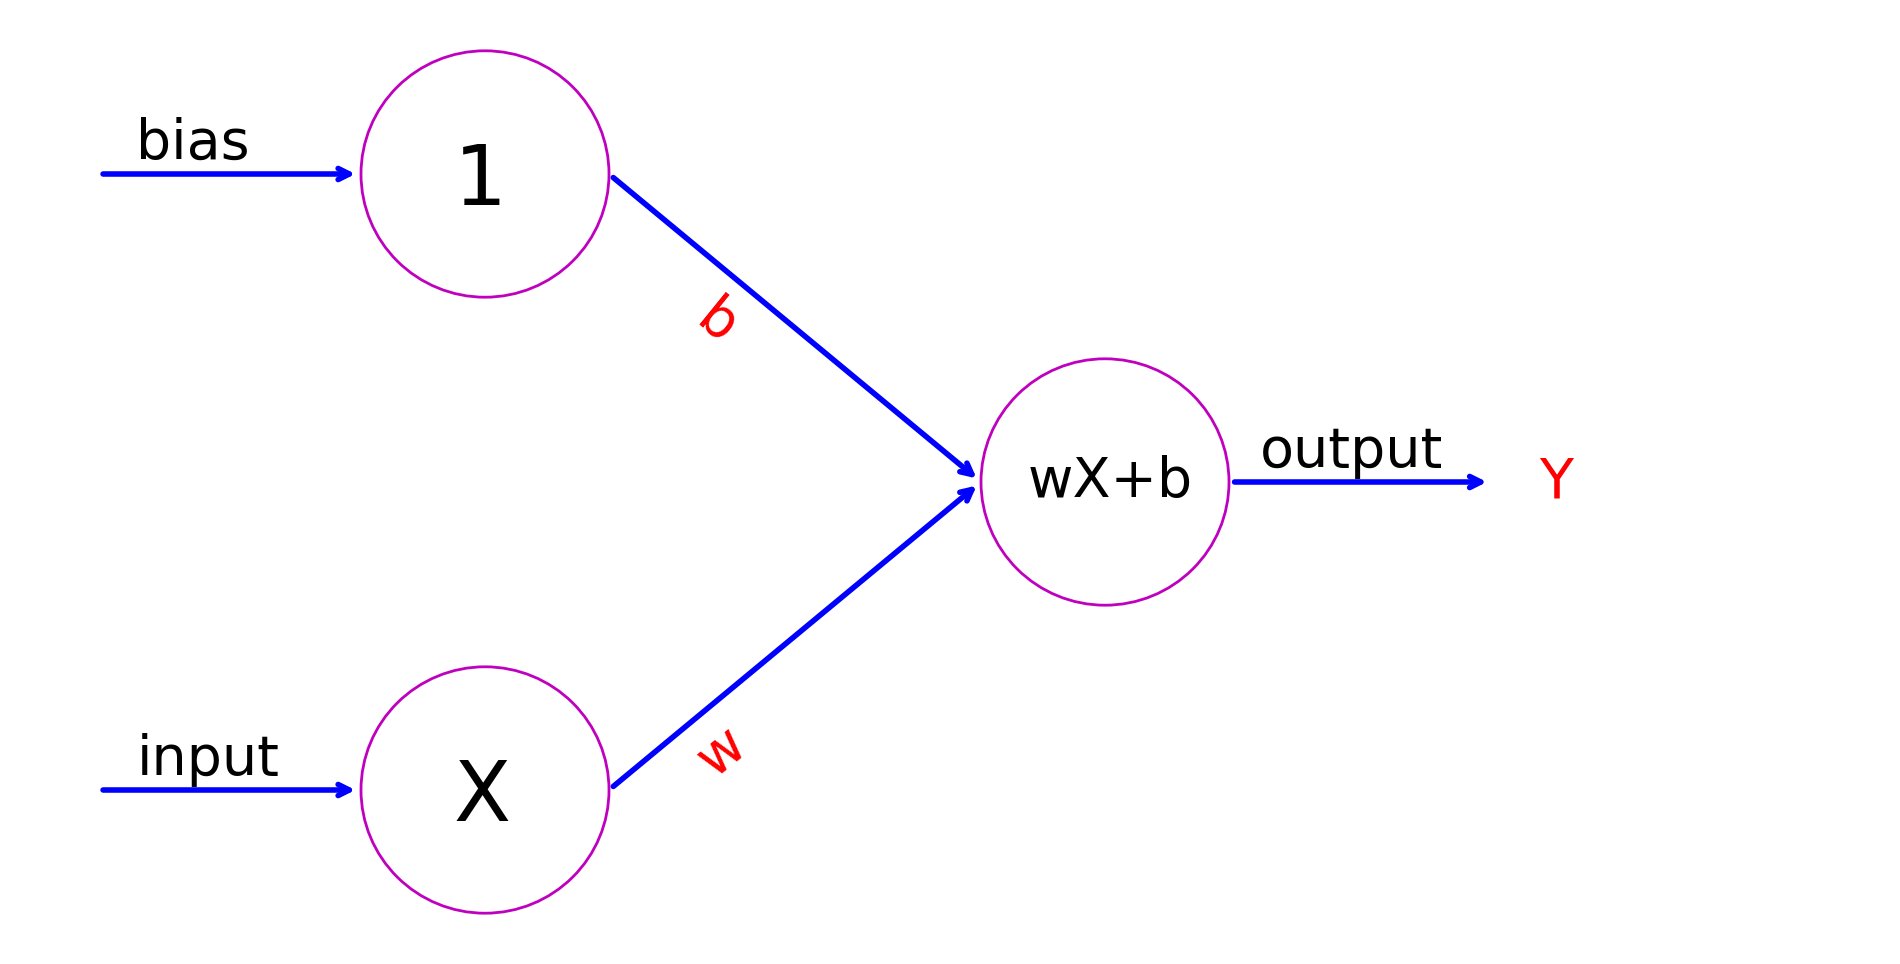

In [2]:
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(12,6),dpi=200)
ax=fig.add_subplot(111)
# Draw the two input neurons
circle=plt.Circle((-3,2),radius=0.8,color='white',ec="m")
ax.add_artist(circle)
circle=plt.Circle((-3,-2),radius=0.8,color='white',ec="m")
ax.add_artist(circle)
# Draw the output neuron
circle=plt.Circle((1,0),radius=0.8,color='white',ec="m")
ax.add_artist(circle)
# Draw connections between neurons
ax.annotate("",xy=(0.2,0),xytext=(-2.2,2),
    arrowprops=dict(arrowstyle='->',
    color='b',linewidth=2))
ax.annotate("",xy=(0.2,0),xytext=(-2.2,-2),
    arrowprops=dict(arrowstyle='->',
    color='b',linewidth=2))
ax.annotate("",xy=(-3.8,-2),xytext=(-5.5,-2),
    arrowprops=dict(arrowstyle='->',
    color='b',linewidth=2))
ax.annotate("",xy=(-3.8,2),xytext=(-5.5,2),
    arrowprops=dict(arrowstyle='->',
    color='b',linewidth=2))
ax.annotate("",xy=(3.5,0),xytext=(1.8,0),
    arrowprops=dict(arrowstyle='->',
    color='b',linewidth=2))
# Create explanations in the graph
plt.text(-5.25,2.1,"bias",fontsize=20,color="k")
plt.text(-5.25,-1.9,"input",fontsize=20,color="k")
plt.text(2,0.1,"output",fontsize=20,color="k")
plt.text(-1.7,-1.9,f"w",fontsize=20,color="r",rotation=39)
plt.text(-1.7,0.9,f"b",fontsize=20,color="r",rotation=-39)
plt.text(-3.2,1.8,"1",fontsize=30,color="k")
plt.text(-3.2,-2.2,"X",fontsize=30,color="k")
plt.text(0.5,-0.1,"wX+b",fontsize=20,color="k")
plt.text(3.8,-0.1,f"Y",fontsize=20,color="r")
ax.set_xlim(-6,6)
ax.set_ylim(-3,3)
plt.axis("off")
plt.savefig(f"files/ch05/nn.png")

## 5.1.2 How Does A Neural Network Learn?

In [3]:
import numpy as np

# the values of X and Y
X=np.array([-40, -30, -10, 0, 5, 10, 20, 40, 60, 100]\
          ).reshape(-1,1)
Y=np.array([-40.0, -22.0, 14.0, 32.0, 41.0, 50.0, 68.0,\
            104.0, 140.0, 212.0]).reshape(-1,1)
# create a vector of ones as the bias term
const=np.tile(1,[len(X),1])
# randomly assign values to w and b
w=1
b=1
# reshape w and b to matrix form 
w=np.array([w]).reshape(1,1)
b=np.array([b]).reshape(1,1)
print(f"the initial weights are w={w[0,0]} and b={b[0,0]}")
# set the learning rate
lr=0.0005
# record results
ws, bs, yhats, losses = [], [], [], []
# train the model
for i in range(10000):
    # make predictions
    pred=np.matmul(X, w) + b
    # calculate loss as MSE
    loss=(Y-pred).T@(Y-pred)/len(Y)
    # calculate gradients
    dldw=-2*X.T@(Y-pred)/len(X)
    dldb=-2*const.T@(Y-pred)/len(X)
    # perform gradient descent
    w = w - lr*dldw
    b = b - lr*dldb
    if (i+1)%1000==0:
        print(f"iteration: {i+1}, loss: {loss[0,0]:.2f},",end="")
        print(f" weights: w={w[0,0]:.4f}, b={b[0,0]:.4f}")
    ws.append(w[0,0])
    bs.append(b[0,0])
    yhats.append(pred)
    losses.append(loss[0,0])

the initial weights are w=1 and b=1
iteration: 1000, loss: 146.96, weights: w=1.9100, b=19.0060
iteration: 2000, loss: 25.84, weights: w=1.8461, b=26.5518
iteration: 3000, loss: 4.54, weights: w=1.8193, b=29.7157
iteration: 4000, loss: 0.80, weights: w=1.8081, b=31.0422
iteration: 5000, loss: 0.14, weights: w=1.8034, b=31.5984
iteration: 6000, loss: 0.02, weights: w=1.8014, b=31.8316
iteration: 7000, loss: 0.00, weights: w=1.8006, b=31.9294
iteration: 8000, loss: 0.00, weights: w=1.8003, b=31.9704
iteration: 9000, loss: 0.00, weights: w=1.8001, b=31.9876
iteration: 10000, loss: 0.00, weights: w=1.8000, b=31.9948


## 5.1.3 Make Predictions

Now the model is trained. We can print out the final, converged values of parameters w and b. As a result, we also know the exact relation between X and Y, as follows:

In [4]:
# Obtain the converged values of w and b
w=ws[-1]
b=bs[-1]
print(f"the values of w and b are w={w:.2f} and b={b:.2f}")

the values of w and b are w=1.80 and b=31.99


In [5]:
print(f"the relation between X and Y is Y={w:.2f}X+{b:.2f}.")
pred_Y=w*50+b
print(f"when X=50, the prediction is Y={pred_Y:.2f}")

the relation between X and Y is Y=1.80X+31.99.
when X=50, the prediction is Y=122.00


# 5.2 Animate the Learning Process

## 5.2.1 Generate Graphs

In [6]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

# select the steps to create graphs
steps=[x for x in range(len(ws)) if x==0 or (x+1)%200==0]
for k in steps:
    w=round(ws[k],3)
    b=round(bs[k],1)   
    loss=round(losses[k],3)    
    yhat=yhats[k]  
    fig = plt.figure(figsize=(12,6), dpi=200)
    ax = fig.add_subplot(111)
    # add rectangle to plot
    ax.add_patch(Rectangle((2.2,-2.5), 1.5, 5,
                 edgecolor = 'k',alpha=0.1))
    ax.add_patch(Rectangle((4,-2.5), 1.7, 5,
                 edgecolor = 'k',alpha=0.1))
    # Draw the two input neurons
    c=plt.Circle((-3,2),radius=0.8,color='white',ec="m")
    ax.add_artist(c)
    c=plt.Circle((-3,-2),radius=0.8,color='white',ec="m")
    ax.add_artist(c)
    # Draw the output neuron
    c=plt.Circle((1,0),radius=0.8,color='white',ec="m")
    ax.add_artist(c)
    # Draw connections between neurons
    ax.annotate("",xy = (0.2,0),xytext = (-2.2,2), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    ax.annotate("",xy = (0.2,0),xytext = (-2.2,-2), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    ax.annotate("",xy = (-3.8,-2),xytext = (-5.5,-2), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    ax.annotate("",xy = (-3.8,2),xytext = (-5.5,2), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    ax.annotate("",xy = (2.2,0),xytext = (1.8,0), 
                       arrowprops=dict(arrowstyle = '->',
                       color = 'b', linewidth = 2))
    # put epoch number and losses up
    plt.text(-0.7, 2.2, f"epoch={k+1}\nloss={loss}",
             fontsize=20, color="g")   
    # Put explanation texts on the graph
    plt.text(-5.25, 2.1, "bias", fontsize=20, color="k")
    plt.text(-5.25, -1.9, "input", fontsize=20, color="k")
    plt.text(2.3, 2.6, "output", fontsize=20, color="k")
    plt.text(4.3, 2.6, "loss", fontsize=20, color="k")
    plt.text(-1.7, -1.9, f"w={w}", fontsize=20, 
             color="r",rotation=39)
    plt.text(-1.7, 0.9, f"b={b}", fontsize=20,
             color="r",rotation=-39)
    plt.text(-3.2, 1.8, "1", fontsize=30, color="k")
    plt.text(-3.2, -2.2, "X", fontsize=30, color="k")
    plt.text(0.5, -0.1, "wX+b", fontsize=20, color="k")
    plt.text(2.3, -2.92, "$\hat{Y}$", fontsize=15, color="r")
    plt.text(4, -2.92, "$(\hat{Y}-Y)^2$",
             fontsize=15, color="r")
    for i in range(10):
        plt.text(4, 2.2-i*0.5, 
         f"$({round(Y[i,0],1)}-({round(yhat[i,0],1)})"+")^2$",
         fontsize=10, color="k")
        plt.text(2.3, 2.2-i*0.5, f"{i+1}: "+
         "$\hat{Y}$"+f"={round(yhat[i,0],3)}",
                 fontsize=10, color="k") 
    ax.set_xlim(-6, 6)
    ax.set_ylim(-3, 3)
    plt.axis("off")
    plt.savefig(f"files/ch05/nn{k}.png")
    plt.close(fig)

For example, if you open the picture nn16.png, you'll see the following:<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/nn16.png" />

## 5.2.2 Create Animation Based on Graphs

In [7]:
import imageio, PIL

frames=[]
for k in steps:
    frame=PIL.Image.open(f"files/ch05/nn{k}.png")
    frame=np.asarray(frame)
    frames.append(np.array(frame))
imageio.mimsave('files/ch05/nn.gif', frames, duration=200)

You'll see the animation as follows:<br>
<img src="https://gattonweb.uky.edu/faculty/lium/ml/nn.gif" />

## 5.2.3 Subplots of Different Stages

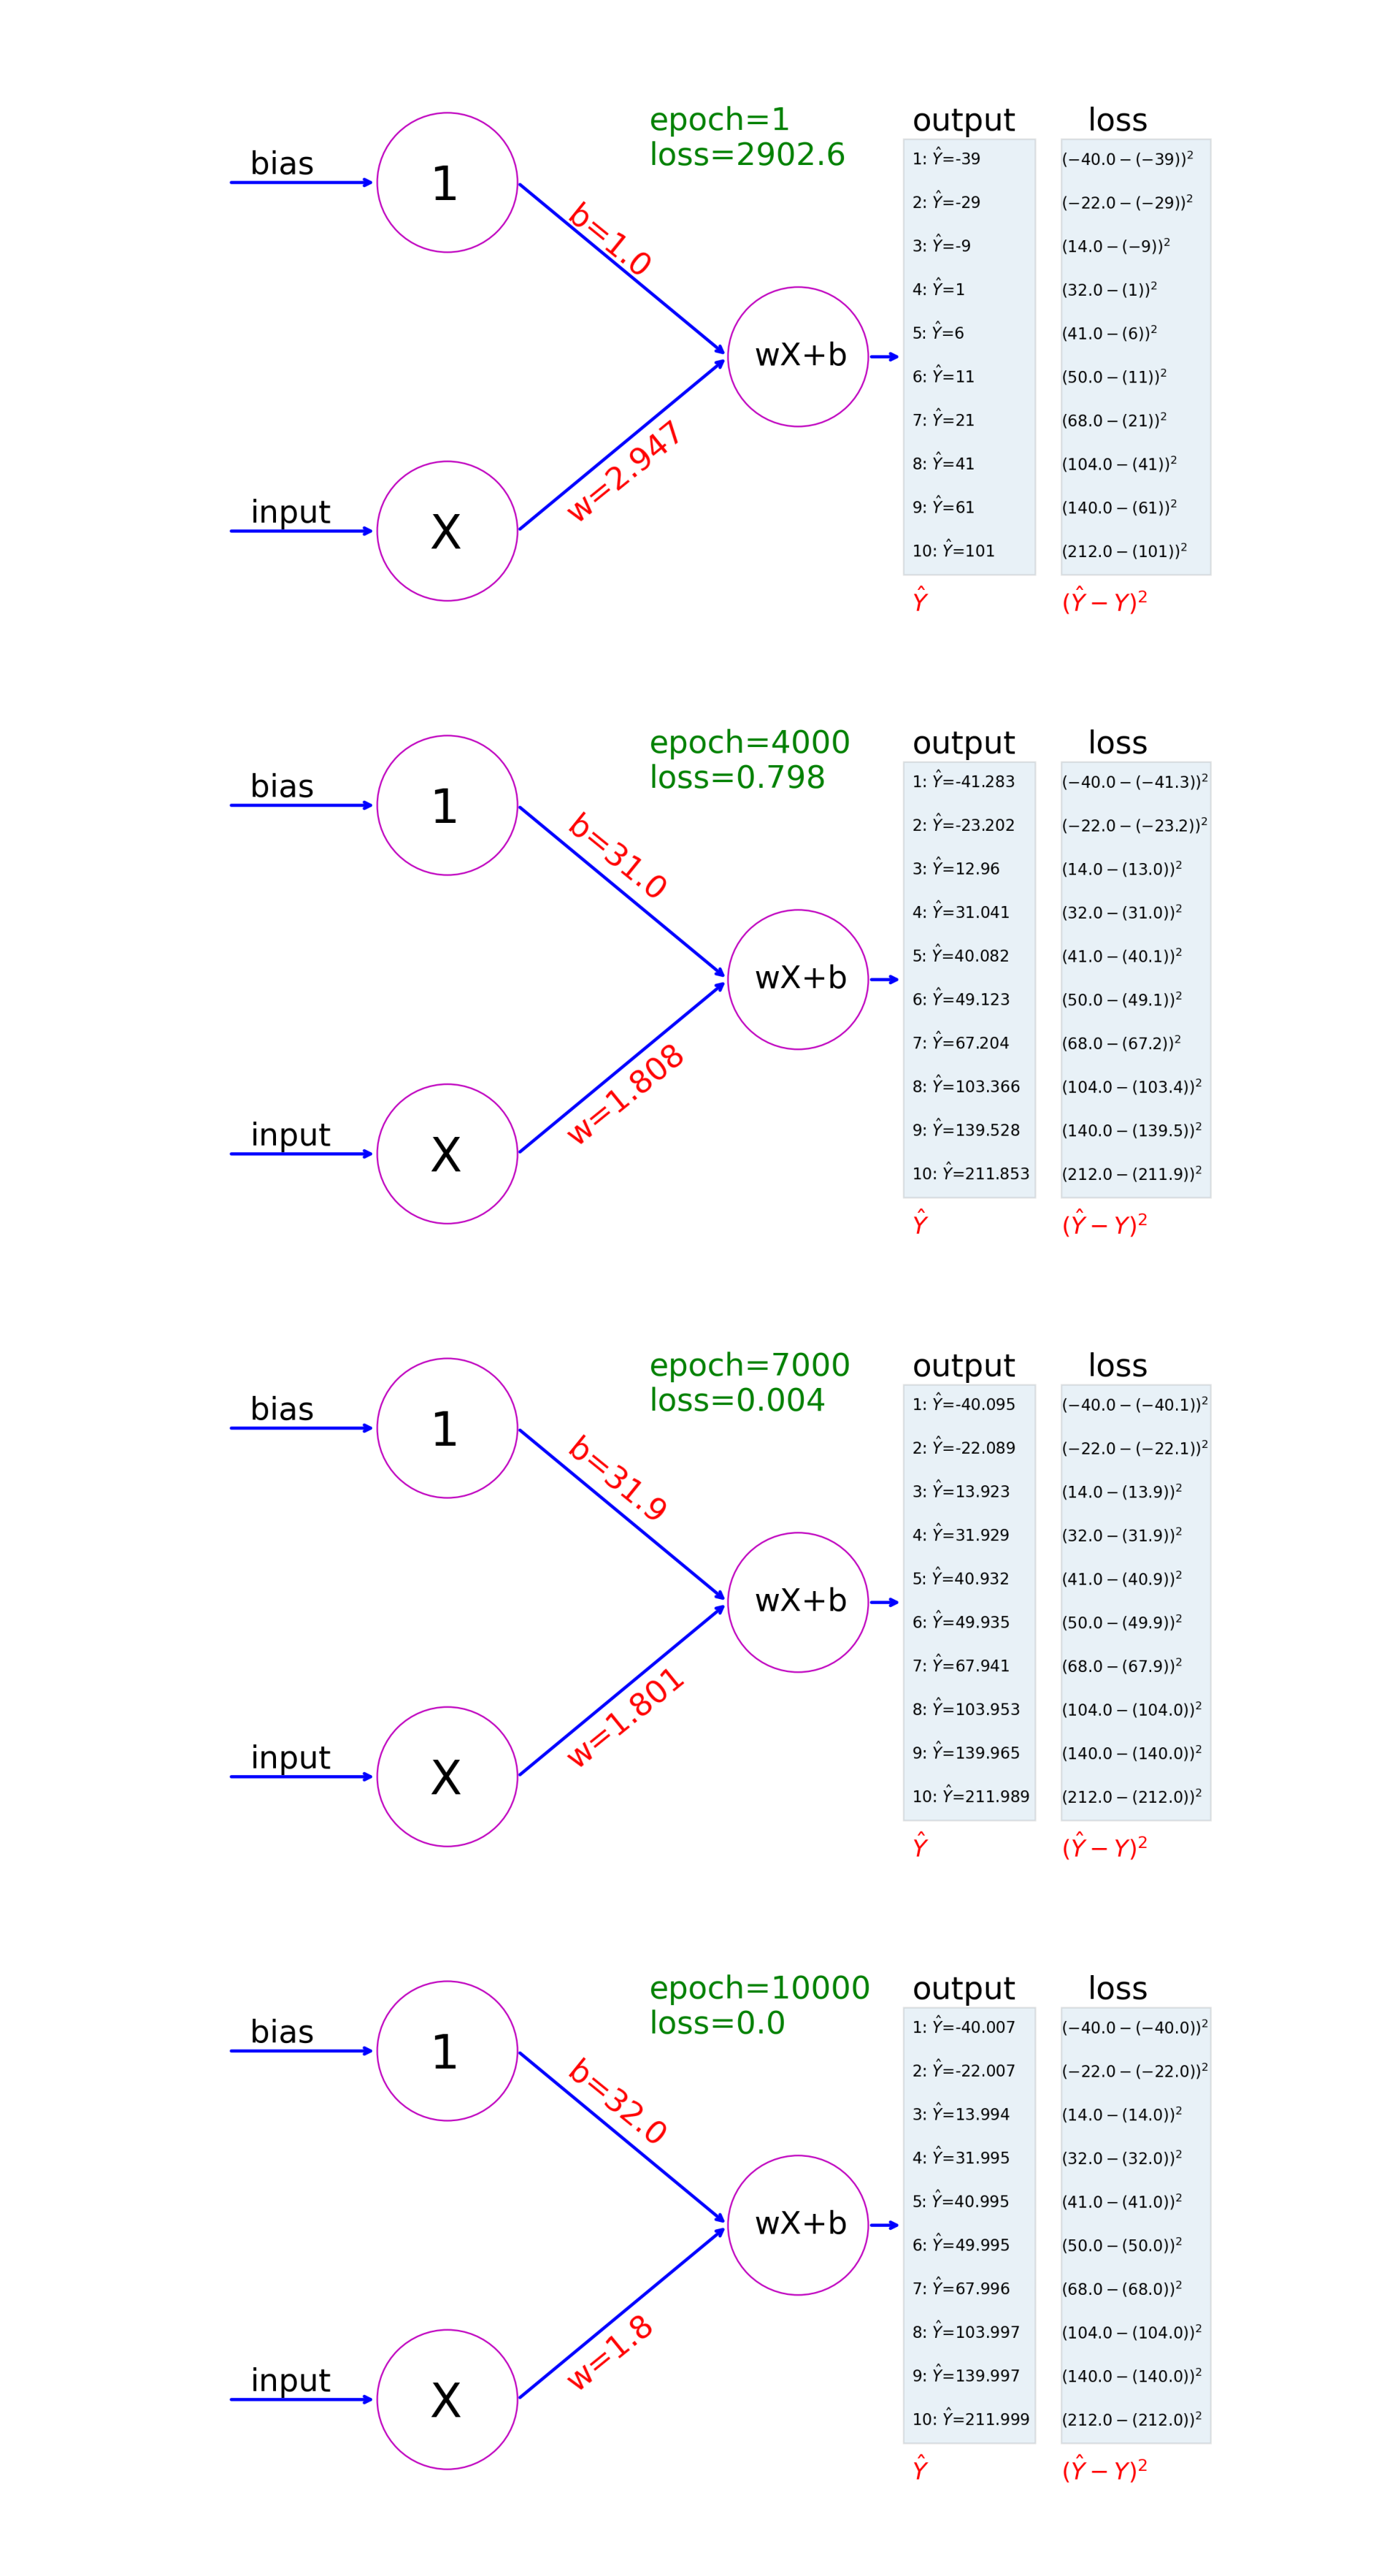

In [8]:
frames=[]
frame1=PIL.Image.open(f"files/ch05/nn0.png")
frame2=PIL.Image.open(f"files/ch05/nn3999.png")
frame3=PIL.Image.open(f"files/ch05/nn6999.png")
frame4=PIL.Image.open(f"files/ch05/nn9999.png")
frames.append(frame1)
frames.append(frame2)
frames.append(frame3)
frames.append(frame4)

plt.figure(dpi=200,figsize=(12,24))
for i in range(4):
        plt.subplot(4,1,i+1)
        plt.imshow(frames[i])
        plt.axis("off")
plt.subplots_adjust(hspace=-0.25)
plt.show()

# 5.3 Create A Neural Network with Keras

## 5.3.1 Construct the Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
first_nn=Sequential()
first_nn.add(Dense(1,input_shape=[1]))

## 5.3.2 Compile and Train the Model

In [11]:
import tensorflow as tf

# Fix the random state so results are reproducible
tf.random.set_seed(0)
first_nn.compile(loss='mean_squared_error',  
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=['mse'])

In [12]:
X=np.array([-40, -30, -10, 0, 5, 10, 20,\
              40, 60, 100],dtype=float).reshape(-1,1)
Y=np.array([-40, -22, 14, 32, 41, 50,\
    68, 104, 140, 212],dtype=float).reshape(-1,1)
history=first_nn.fit(X, Y, verbose=0, \
                     epochs=10000, batch_size=10)

## 5.3.3 Make Predictions

In [13]:
w, bias = first_nn.layers[-1].get_weights()
print(f"weights are {w[0,0], bias[0]}")

pred = first_nn.predict([[50]])
print(f"when X=50, the prediction is Y={round(pred[0,0],2)}")

weights are (1.8, 32.0)
1/1 [==============================] - 0s 62ms/step
when X=50, the prediction is Y=122.0


In [14]:
MSE = first_nn.evaluate(X, Y)

1/1 [==============================] - 0s 72ms/step - loss: 0.0000e+00 - mse: 0.0000e+00


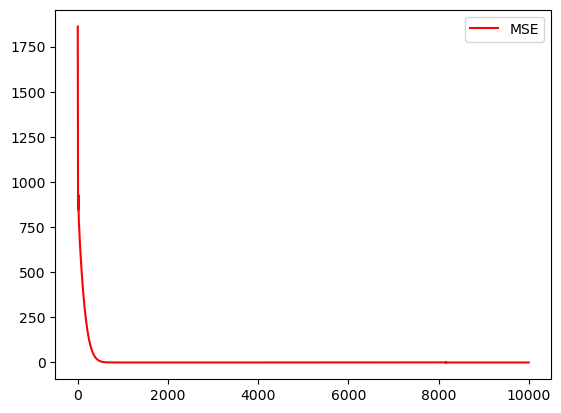

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history["mse"],label='MSE',color="r")
plt.legend()
plt.show()

# 5.4 Customize Training with GradientTape

## 5.4.1 Construct the Model

In [16]:
g_tape_nn=Sequential()
g_tape_nn.add(Dense(1,input_shape=[1]))

Next, we specify the loss function and the optimizer. We still use the mean squared error loss function, and the Adam optimizer with a learning rate of 0.1.  

In [17]:
mse = tf.keras.losses.MeanSquaredError()
optimizer=tf.keras.optimizers.Adam(learning_rate=0.1)

## 5.4.2 Train the Model

In [18]:
for i in range(10000):
    with tf.GradientTape() as t:
        pred = g_tape_nn(X)
        loss=mse(Y, pred)
    # Update using backpropagation
    gs = t.gradient(loss,g_tape_nn.trainable_variables)
    optimizer.apply_gradients(zip(gs,\
              g_tape_nn.trainable_variables))  

## 5.4.3 Make Predictions

In [19]:
pred = g_tape_nn.predict([[50]])
print(f"when X=50, the prediction is Y={round(pred[0,0],2)}")

1/1 [==============================] - 0s 33ms/step
when X=50, the prediction is Y=122.0


# 5.6 Exercises

In [20]:
# answer to question 5.3
import numpy as np

# the values of X and Y
X=np.array([-40, -30, -10, 0, 5, 10, 20, 40, 60, 100]\
          ).reshape(-1,1)
Y=np.array([-40.0, -22.0, 14.0, 32.0, 41.0, 50.0, 68.0,\
            104.0, 140.0, 212.0]).reshape(-1,1)
# create a vector of ones as the bias term
const=np.tile(1,[len(X),1])
# randomly assign values to w and b
w=0
b=0
# reshape w and b to matrix form 
w=np.array([w]).reshape(1,1)
b=np.array([b]).reshape(1,1)
print(f"the initial weights are w={w[0,0]} and b={b[0,0]}")
# set the learning rate
lr=0.0005
# record results
ws, bs, yhats, losses = [], [], [], []
# train the model
for i in range(10000):
    # make predictions
    pred=np.matmul(X, w) + b
    # calculate loss as MSE
    loss=(Y-pred).T@(Y-pred)/len(Y)
    # calculate gradients
    dldw=-2*X.T@(Y-pred)/len(X)
    dldb=-2*const.T@(Y-pred)/len(X)
    # perform gradient descent
    w = w - lr*dldw
    b = b - lr*dldb
    if (i+1)%1000==0:
        print(f"iteration: {i+1}, loss: {loss[0,0]:.3f},",end="")
        print(f" weights: w={w[0,0]:.3f}, b={b[0,0]:.3f}")
    ws.append(w[0,0])
    bs.append(b[0,0])
    yhats.append(pred)
    losses.append(loss[0,0])

the initial weights are w=0 and b=0
iteration: 1000, loss: 156.516, weights: w=1.913, b=18.590
iteration: 2000, loss: 27.515, weights: w=1.848, b=26.378
iteration: 3000, loss: 4.837, weights: w=1.820, b=29.643
iteration: 4000, loss: 0.850, weights: w=1.808, b=31.012
iteration: 5000, loss: 0.149, weights: w=1.804, b=31.586
iteration: 6000, loss: 0.026, weights: w=1.801, b=31.826
iteration: 7000, loss: 0.005, weights: w=1.801, b=31.927
iteration: 8000, loss: 0.001, weights: w=1.800, b=31.969
iteration: 9000, loss: 0.000, weights: w=1.800, b=31.987
iteration: 10000, loss: 0.000, weights: w=1.800, b=31.995


In [21]:
# answer to question 5.4
pred = g_tape_nn.predict([[-40]])
print(f"when X=-40, the prediction is Y={round(pred[0,0],2)}")

1/1 [==============================] - 0s 24ms/step
when X=-40, the prediction is Y=-40.0
